**Variational autoencoder (VAE)**

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Set the path for the images

In [0]:
pwd_m = '/content/drive/My Drive/Colab Notebooks/Thesis/data/celeb_faces/male_images/*.jpg'
pwd_f = '/content/drive/My Drive/Colab Notebooks/Thesis/data/celeb_faces/female_images/*.jpg'

Load the related packges

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from sklearn import model_selection 

from keras import layers
from keras import Model

Using TensorFlow backend.


**Functions used to do plotting**

The first function is used to plot the 3-channel image and the other one used to plot the images with 1 channel.

In [0]:
# The Function used to plot 3-Channel images
def Plot_Img(n,k,n_c,images,fig_w,fig_h):
    # n is how many digits we will display
    plt.figure(figsize=(fig_w, fig_h))
    for i in range(n):
        # display images
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].reshape(k,k,n_c))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [0]:
# The Function used to plot 1-Channel images
def Plot_Img_1c(n,k,images,fig_w,fig_h):
    # n is how many digits we will display
    plt.figure(figsize=(fig_w, fig_h))
    for i in range(n):
        # display images
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(images[i].reshape(k,k))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Read the images and do the training and testing datasets split.

In [0]:
# Read the image from the google drive and display two examples.
img_m = glob.glob(pwd_m)
img_f = glob.glob(pwd_f)

img_names_m = model_selection.train_test_split(img_m)
img_names_f = model_selection.train_test_split(img_f)

im_train_m = np.array([mpimg.imread(a) for a in img_names_m[0]])
im_test_m = np.array([mpimg.imread(a) for a in img_names_m[1]])
im_train_f = np.array([mpimg.imread(a) for a in img_names_f[0]])
im_test_f = np.array([mpimg.imread(a) for a in img_names_f[1]])

im_train_m = im_train_m.astype('float32') / 255.
im_test_m = im_test_m.astype('float32') / 255.
im_train_f = im_train_f.astype('float32') / 255.
im_test_f = im_test_f.astype('float32') / 255.

Plot some examples of the images I use here

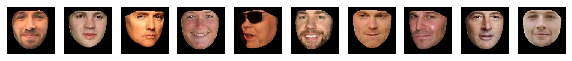

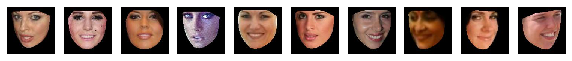

In [7]:
Plot_Img(10,128,3,im_train_m,10,4)
Plot_Img(10,128,3,im_train_f,10,4)

In [8]:
print(len(im_train_m),len(im_train_f))
print(len(im_test_m),len(im_test_f))

309 441
103 147


Shape of the training and testing datasets.

In [9]:
im_train = np.concatenate((im_train_m,im_train_f))
im_test = np.concatenate((im_test_m,im_test_f))
print(im_train.shape,im_test.shape)

(750, 128, 128, 3) (250, 128, 128, 3)


**Autoencoder with Latent variable layer**

**Build up Autoencoder Model with a latent variable layer: A FC layer for encoding**

In [10]:
input_dim = [128,128,3] # The length of the input vector
encode_dim = 2 # The length of the compressed data vector after the encoding

Input = layers.Input(shape=(input_dim[0],input_dim[1],input_dim[2]))
x = layers.Conv2D(16,(3,3),activation='relu',padding='same')(Input)
x = layers.MaxPooling2D((2,2),padding='same')(x)
x = layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = layers.MaxPooling2D((2,2),padding='same')(x)
x = layers.Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = layers.MaxPooling2D((2,2),padding='same')(x)
x = layers.Reshape((16*16,64))(x)
encode = layers.Dense(encode_dim,activation='relu')(x)

x = layers.Reshape((16,16,encode_dim))(encode)
x = layers.Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(16,(3,3),activation='relu',padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
decode = layers.Conv2D(3,(3,3),activation='sigmoid',padding='same')(x)

simple_auto = Model(Input,decode)
simple_auto.summary()
# Using the 'adam' optimization method with the MSE loss function
simple_auto.compile(optimizer='adam', loss='mean_squared_error') 

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_

Seperate the encoder and the decoder models

In [11]:
# The encoder model
encoder = Model(Input,encode)
# The decoder model
decode_Input = layers.Input(shape=(256,encode_dim))
x = simple_auto.layers[9](decode_Input)
x = simple_auto.layers[10](x)
x = simple_auto.layers[11](x)
x = simple_auto.layers[12](x)
x = simple_auto.layers[13](x)
x = simple_auto.layers[14](x)
x = simple_auto.layers[15](x)
x = simple_auto.layers[16](x)
decoder = Model(decode_Input,x)

print(encoder.summary())
print(decoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
__________

**Set up to use the GPU**

In [12]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

Training process and testing evaluation

In [13]:
# Train the model
simple_auto.fit(im_train,im_train,epochs=150,batch_size=25)
# Evaluate the test set
simple_auto.evaluate(im_test,im_test)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
750/750 [==============================] - 5s 6ms/step - loss: 0.0862
Epoch 2/150
750/750 [==============================] - 1s 2ms/step - loss: 0.0115
Epoch 3/150
750/750 [==============================] - 1s 2ms/step - loss: 0.0080
Epoch 4/150
750/750 [==============================] - 1s 2ms/step - loss: 0.0070
Epoch 5/150
750/750 [==============================] - 1s 2ms/step - loss: 0.0063
Epoch 6/150
750/750 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 7/150
750/750 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 8/150
750/750 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 9/150
750/750 [==============================] - 1s 2ms/step - loss: 0.0048
Epoch 10/150
750/750 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 11/150
750/750 [==============================] - 1s 2ms/step - loss: 0.0044
Epoch 12/150
750/750 [==========================

0.001854600029066205

In [14]:
FC_values_train = encoder.predict(im_train)
decoded_img_train = decoder.predict(FC_values_train)
FC_values_test = encoder.predict(im_test)
decoded_img_test = decoder.predict(FC_values_test)
print(FC_values_train.shape,FC_values_test.shape)

(750, 256, 2) (250, 256, 2)


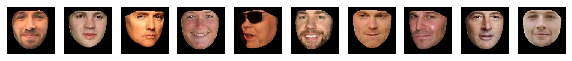

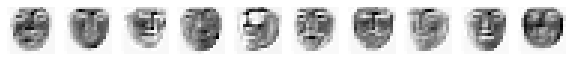

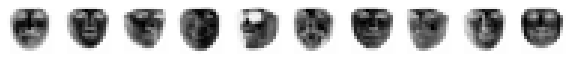

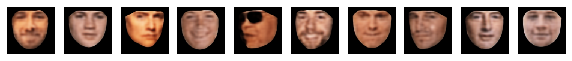

In [15]:
FC_values_train1 = FC_values_train[:,:,0]
FC_values_train2 = FC_values_train[:,:,1]
Plot_Img(10,128,3,im_train,10,4)
Plot_Img_1c(10,16,FC_values_train1,10,4)
Plot_Img_1c(10,16,FC_values_train2,10,4)
Plot_Img(10,128,3,decoded_img_train,10,4)

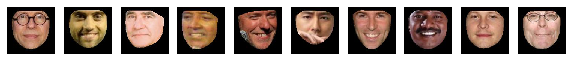

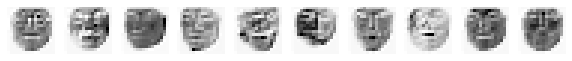

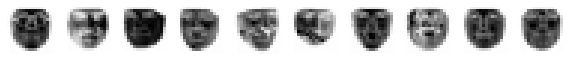

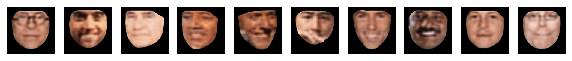

In [16]:
FC_values_test1 = FC_values_test[:,:,0]
FC_values_test2 = FC_values_test[:,:,1]
Plot_Img(10,128,3,im_test,10,4)
Plot_Img_1c(10,16,FC_values_test1,10,4)
Plot_Img_1c(10,16,FC_values_test2,10,4)
Plot_Img(10,128,3,decoded_img_test,10,4)

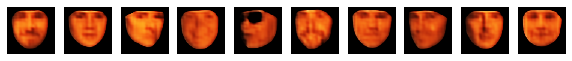

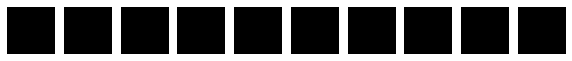

In [17]:
FC_values_train = encoder.predict(im_train)
FC_00 = FC_values_train
FC_00[:,:,0] = 0
decoded_img_00 = decoder.predict(FC_00)
Plot_Img(10,128,3,decoded_img_00,10,4)

FC_values_train = encoder.predict(im_train)
FC_10 = FC_values_train
FC_10[:,:,1] = 0
decoded_img_10 = decoder.predict(FC_10)
Plot_Img(10,128,3,decoded_img_10,10,4)

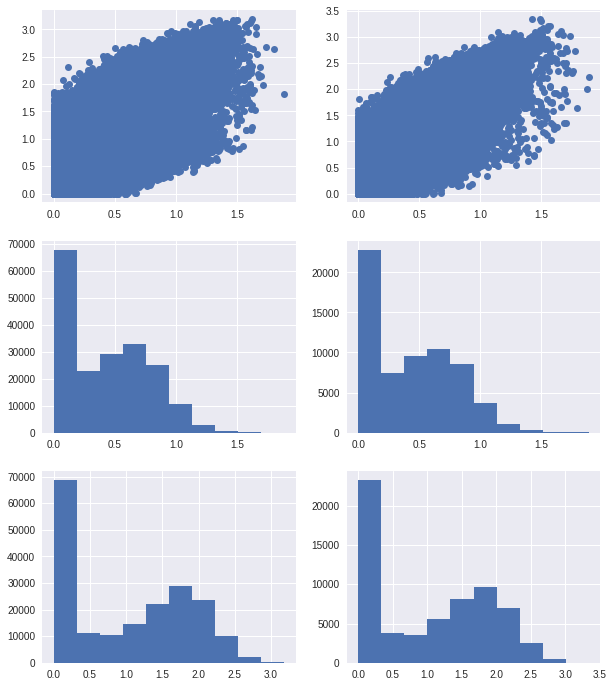

In [30]:
# Dot plots and the histograms of the FC values for the training and testing datasets
plt.figure(figsize=(10, 12))
ax = plt.subplot(3,2,1)
plt.plot(FC_values_train1.reshape((np.prod(FC_values_train1.shape),)),\
         FC_values_train2.reshape((np.prod(FC_values_train2.shape),1)),'o')
ax = plt.subplot(3,2,2)
plt.plot(FC_values_test1.reshape((np.prod(FC_values_test1.shape),)),\
         FC_values_test2.reshape((np.prod(FC_values_test2.shape),1)),'o')
ax = plt.subplot(3,2,3)
plt.hist(FC_values_train1.reshape((np.prod(FC_values_train1.shape),)))
ax = plt.subplot(3,2,4)
plt.hist(FC_values_test1.reshape((np.prod(FC_values_test1.shape),)))
ax = plt.subplot(3,2,5)
plt.hist(FC_values_train2.reshape((np.prod(FC_values_train2.shape),)))
ax = plt.subplot(3,2,6)
plt.hist(FC_values_test2.reshape((np.prod(FC_values_test2.shape),)))
plt.show()

In [0]:
input_dim = [128,128,3] # The length of the input vector
encode_dim = 10 # The length of the compressed data vector after the encoding

Input = layers.Input(shape=(input_dim[0],input_dim[1],input_dim[2]))
x = layers.Conv2D(16,(3,3),activation='relu',padding='same')(Input)
x = layers.MaxPooling2D((2,2),padding='same')(x)
x = layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = layers.MaxPooling2D((2,2),padding='same')(x)
x = layers.Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = layers.MaxPooling2D((2,2),padding='same')(x)
x = layers.Reshape((16*16,64))(x)
encode_10 = layers.Dense(encode_dim,activation='relu')(x)

x = layers.Reshape((16,16,encode_dim))(encode_10)
x = layers.Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(16,(3,3),activation='relu',padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
decode_10 = layers.Conv2D(3,(3,3),activation='sigmoid',padding='same')(x)

auto_10 = Model(Input,decode_10)
# Using the 'adam' optimization method with the MSE loss function
auto_10.compile(optimizer='adam', loss='mean_squared_error') 

# The encoder model
encoder_10 = Model(Input,encode_10)
# The decoder model
decode_Input_10 = layers.Input(shape=(256,encode_dim))
x = auto_10.layers[9](decode_Input_10)
x = auto_10.layers[10](x)
x = auto_10.layers[11](x)
x = auto_10.layers[12](x)
x = auto_10.layers[13](x)
x = auto_10.layers[14](x)
x = auto_10.layers[15](x)
x = auto_10.layers[16](x)
decoder_10 = Model(decode_Input_10,x)

In [32]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

# Train the model
auto_10.fit(im_train,im_train,epochs=100,batch_size=25)
# Evaluate the test set
auto_10.evaluate(im_test,im_test)

Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0653
Epoch 2/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0112
Epoch 3/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0069
Epoch 4/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0060
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 6/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0053
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 8/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0046
Epoch 9/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0043
Epoch 10/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 11/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 12/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0036
Epoch 13/100


0.0017788329711183905

In [33]:
FC_values_train_10 = encoder_10.predict(im_train)
decoded_img_train_10 = decoder_10.predict(FC_values_train_10)
FC_values_test_10 = encoder_10.predict(im_test)
decoded_img_test_10 = decoder_10.predict(FC_values_test_10)
print(FC_values_train_10.shape,FC_values_test_10.shape)

(750, 256, 10) (250, 256, 10)


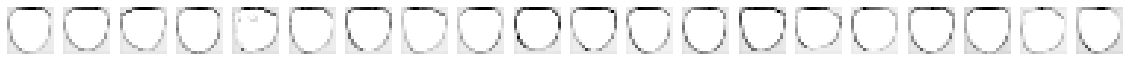

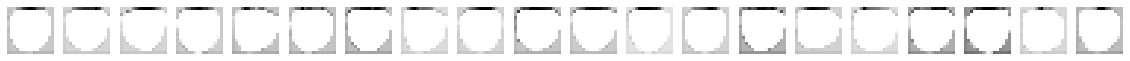

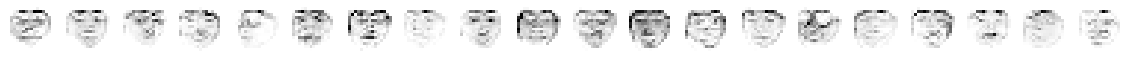

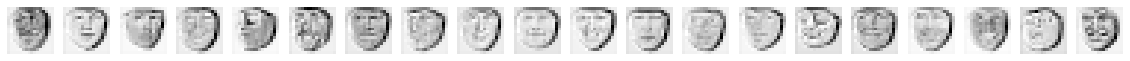

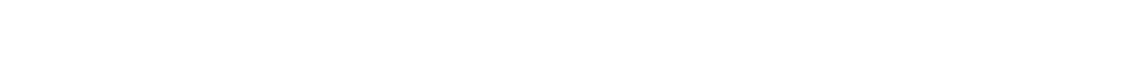

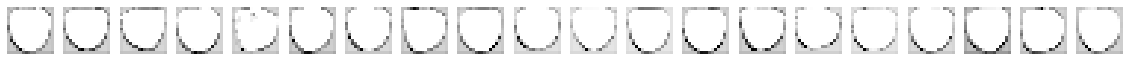

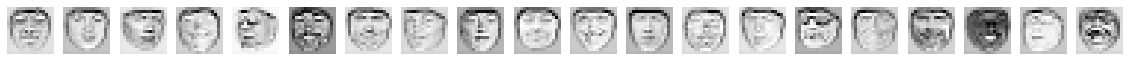

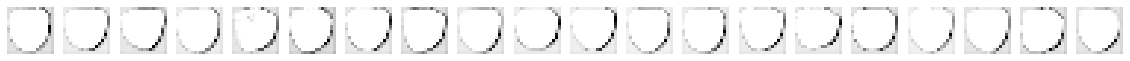

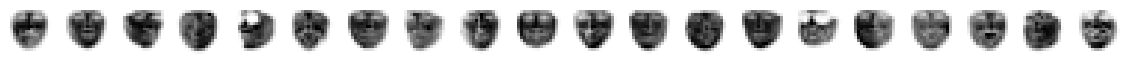

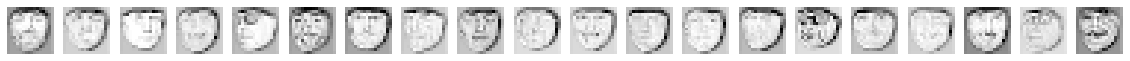

In [34]:
for i in range(encode_dim):
    Plot_Img_1c(20,16,FC_values_train_10[:,:,i],20,4)

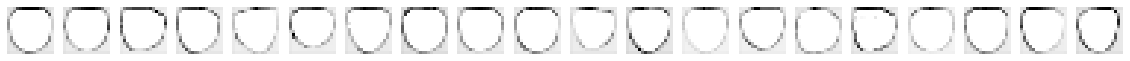

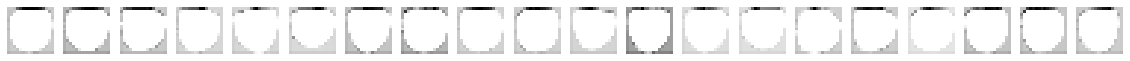

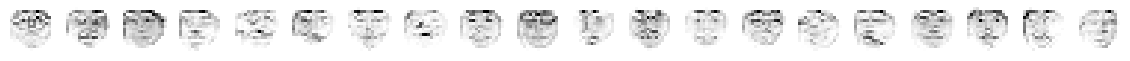

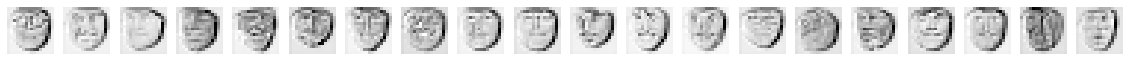

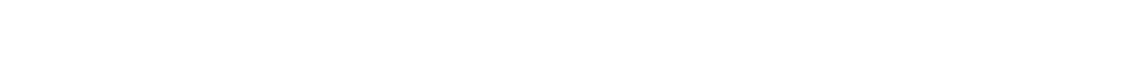

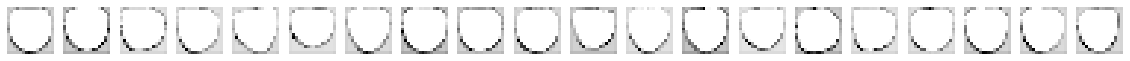

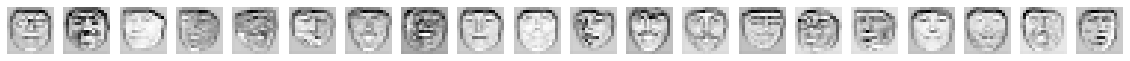

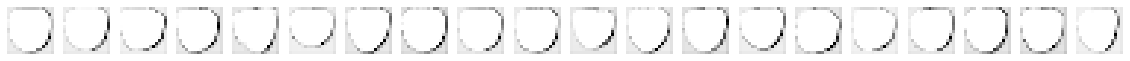

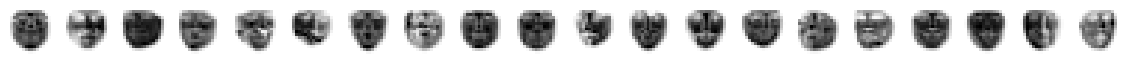

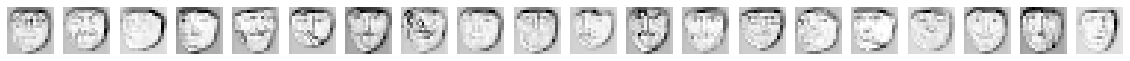

In [35]:
for i in range(encode_dim):
    Plot_Img_1c(20,16,FC_values_test_10[:,:,i],20,4)

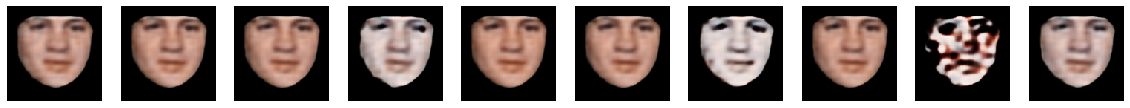

In [44]:
plt.figure(figsize=(20,8))
for i in range(10):
  FC_values_train_10 = encoder_10.predict(im_train)
  im2_fc = FC_values_train_10[1:2,:,:]
  im2_fc_mean = np.mean(im2_fc[:,:,i])
  im2_fc_sd = np.sqrt(np.var(im2_fc[:,:,i]))
  for j in range(256):
      im2_fc[:,j,0][0] = np.random.normal(im2_fc_mean,im2_fc_sd/3)
  decoded_im2 = decoder_10.predict(im2_fc)
  ax = plt.subplot(1,10,i+1)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.imshow(decoded_im2[0])

**Variational Autoencoder**